# Reliance comm vs Bharti Airtel Stock Analysis
### by Bibhash Kalita 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import pandas_datareader
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 5, 8)
relcom = web.DataReader("NSE/RCOM",'quandl', start, end)

In [6]:
relcom.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-05-07,15.20,15.8,15.15,15.50,15.55,46573218.0,7192.97
2018-05-04,15.10,15.9,14.50,15.30,15.35,85210340.0,12998.05
2018-05-03,16.00,16.1,14.85,15.10,15.05,72648942.0,11177.76
2018-05-02,15.25,17.9,15.00,16.15,16.05,170980066.0,28631.29
2018-04-30,15.65,15.9,14.65,15.25,15.30,78831548.0,11984.58


In [7]:
relcom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2018-05-07 to 2017-01-02
Data columns (total 7 columns):
Open                  333 non-null float64
High                  333 non-null float64
Low                   333 non-null float64
Last                  333 non-null float64
Close                 333 non-null float64
TotalTradeQuantity    333 non-null float64
TurnoverLacs          333 non-null float64
dtypes: float64(7)
memory usage: 20.8 KB


In [8]:
airtel = web.DataReader("NSE/BHARTIARTL",'quandl', start, end)

In [9]:
airtel.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-05-07,401.50,404.55,395.5,398.50,398.25,5906011.0,23625.89
2018-05-04,410.85,418.35,394.0,398.00,396.75,14415306.0,58442.89
2018-05-03,406.30,408.00,399.0,405.05,404.40,3716970.0,15008.08
2018-05-02,412.90,412.90,406.0,409.60,408.45,6087447.0,24873.28
2018-04-30,407.00,413.25,404.2,410.00,409.55,3274387.0,13411.75


In [10]:
airtel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2018-05-07 to 2017-01-02
Data columns (total 7 columns):
Open                  333 non-null float64
High                  333 non-null float64
Low                   333 non-null float64
Last                  333 non-null float64
Close                 333 non-null float64
TotalTradeQuantity    333 non-null float64
TurnoverLacs          333 non-null float64
dtypes: float64(7)
memory usage: 20.8 KB


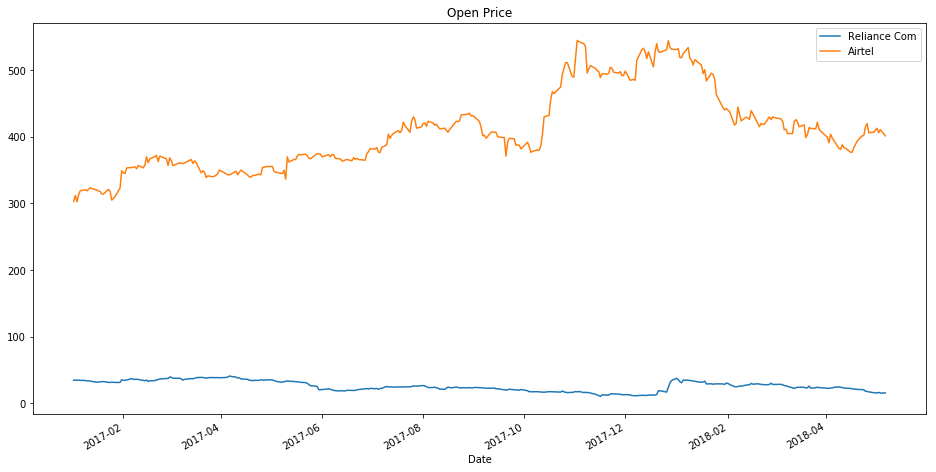

In [11]:
relcom['Open'].plot(label='Reliance Com',figsize=(16,8),title='Open Price')
airtel['Open'].plot(label='Airtel')
plt.legend()

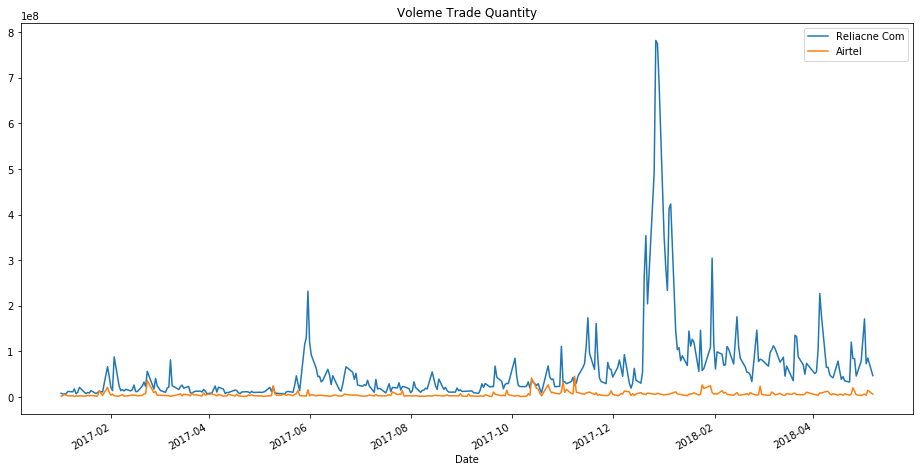

In [12]:
relcom['TotalTradeQuantity'].plot(label='Reliacne Com',figsize=(16,8),title='Voleme Trade Quantity')
airtel['TotalTradeQuantity'].plot(label='Airtel')
plt.legend()

In [13]:
relcom['TotalTradeQuantity'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2017-12-27 00:00:00')

In [14]:
relcom['TurnoverLacs'].mean()

14781.744324324309

In [15]:
airtel['TurnoverLacs'].mean()

24936.075975975993

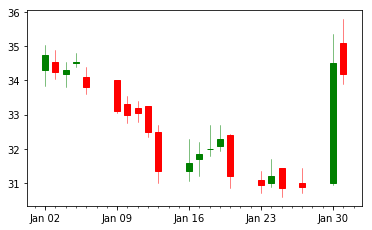

In [16]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
relcom_reset = relcom.loc['2017-01':'2017-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
relcom_reset['date_ax'] = relcom_reset['Date'].apply(lambda date: date2num(date))
relcom_values = [tuple(vals) for vals in relcom_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, relcom_values, width=0.6, colorup='g',colordown='r');

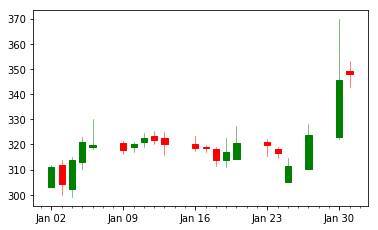

In [18]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
airtel_reset = airtel.loc['2017-01':'2017-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
airtel_reset['date_ax'] = airtel_reset['Date'].apply(lambda date: date2num(date))
airtel_values = [tuple(vals) for vals in airtel_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, airtel_values, width=0.6, colorup='g',colordown='r');

###  Daily Percentage Change

In [19]:
relcom['returns'] = relcom['Close'].pct_change(1)

In [20]:
relcom.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns
Date,,,,,,,,
2018-05-07,15.20,15.8,15.15,15.50,15.55,46573218.0,7192.97,NaN
2018-05-04,15.10,15.9,14.50,15.30,15.35,85210340.0,12998.05,-0.012862
2018-05-03,16.00,16.1,14.85,15.10,15.05,72648942.0,11177.76,-0.019544
2018-05-02,15.25,17.9,15.00,16.15,16.05,170980066.0,28631.29,0.066445
2018-04-30,15.65,15.9,14.65,15.25,15.30,78831548.0,11984.58,-0.046729


In [21]:
airtel['returns'] = airtel['Close'].pct_change(1)

In [22]:
airtel.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns
Date,,,,,,,,
2018-05-07,401.50,404.55,395.5,398.50,398.25,5906011.0,23625.89,NaN
2018-05-04,410.85,418.35,394.0,398.00,396.75,14415306.0,58442.89,-0.003766
2018-05-03,406.30,408.00,399.0,405.05,404.40,3716970.0,15008.08,0.019282
2018-05-02,412.90,412.90,406.0,409.60,408.45,6087447.0,24873.28,0.010015
2018-04-30,407.00,413.25,404.2,410.00,409.55,3274387.0,13411.75,0.002693


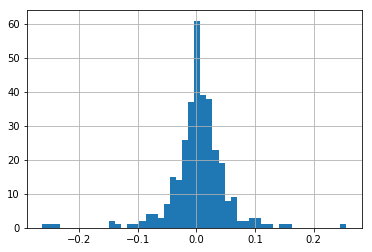

In [23]:
relcom['returns'].hist(bins=50)

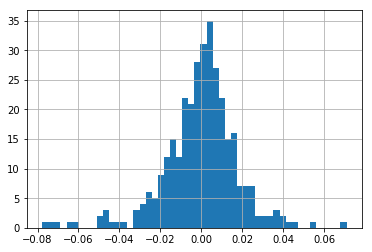

In [24]:
airtel['returns'].hist(bins=50)

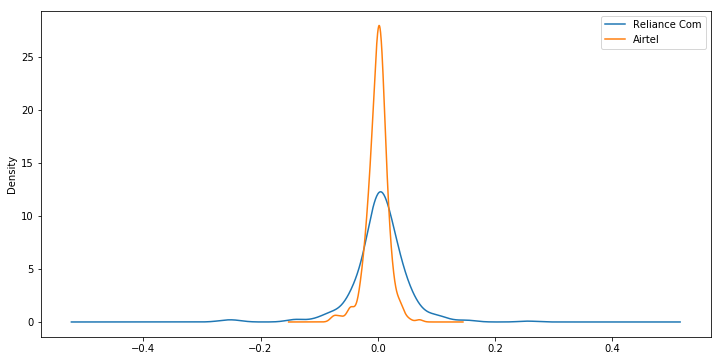

In [25]:
relcom['returns'].plot(kind='kde',label='Reliance Com',figsize=(12,6))
airtel['returns'].plot(kind='kde',label='Airtel')
plt.legend()

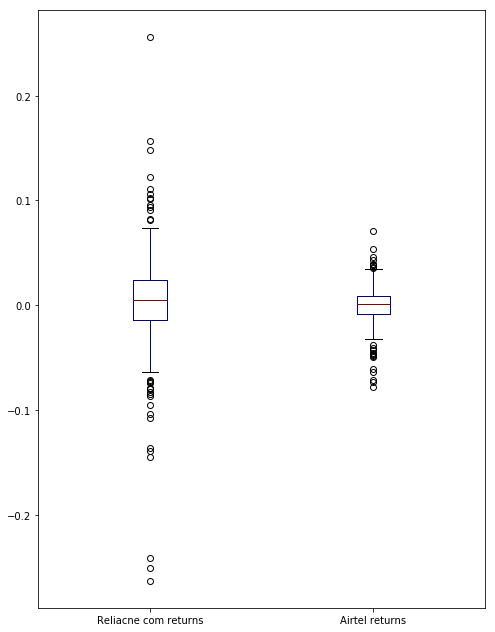

In [26]:
box_df = pd.concat([relcom['returns'],airtel['returns']],axis=1)
box_df.columns = ['Reliacne com returns','Airtel returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

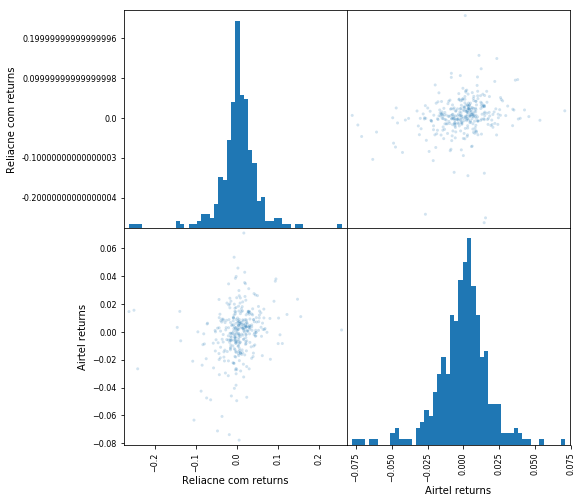

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

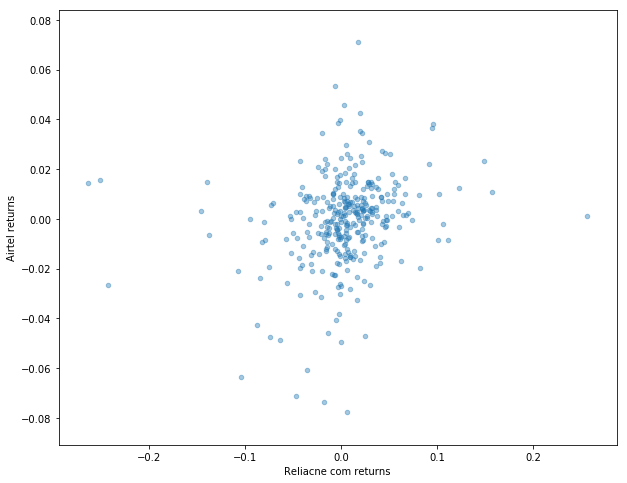

In [29]:
box_df.plot(kind='scatter',x='Reliacne com returns',y='Airtel returns',alpha=0.4,figsize=(10,8))

### Cumulative Daily Returns 

In [30]:
relcom['Cumulative Return'] = (1 + relcom['returns']).cumprod()

In [31]:
airtel['Cumulative Return'] = (1 + airtel['returns']).cumprod()

In [32]:
relcom.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns,Cumulative Return
Date,,,,,,,,,
2018-05-07,15.20,15.8,15.15,15.50,15.55,46573218.0,7192.97,NaN,NaN
2018-05-04,15.10,15.9,14.50,15.30,15.35,85210340.0,12998.05,-0.012862,0.987138
2018-05-03,16.00,16.1,14.85,15.10,15.05,72648942.0,11177.76,-0.019544,0.967846
2018-05-02,15.25,17.9,15.00,16.15,16.05,170980066.0,28631.29,0.066445,1.032154
2018-04-30,15.65,15.9,14.65,15.25,15.30,78831548.0,11984.58,-0.046729,0.983923


In [33]:
airtel.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns,Cumulative Return
Date,,,,,,,,,
2018-05-07,401.50,404.55,395.5,398.50,398.25,5906011.0,23625.89,NaN,NaN
2018-05-04,410.85,418.35,394.0,398.00,396.75,14415306.0,58442.89,-0.003766,0.996234
2018-05-03,406.30,408.00,399.0,405.05,404.40,3716970.0,15008.08,0.019282,1.015443
2018-05-02,412.90,412.90,406.0,409.60,408.45,6087447.0,24873.28,0.010015,1.025612
2018-04-30,407.00,413.25,404.2,410.00,409.55,3274387.0,13411.75,0.002693,1.028374


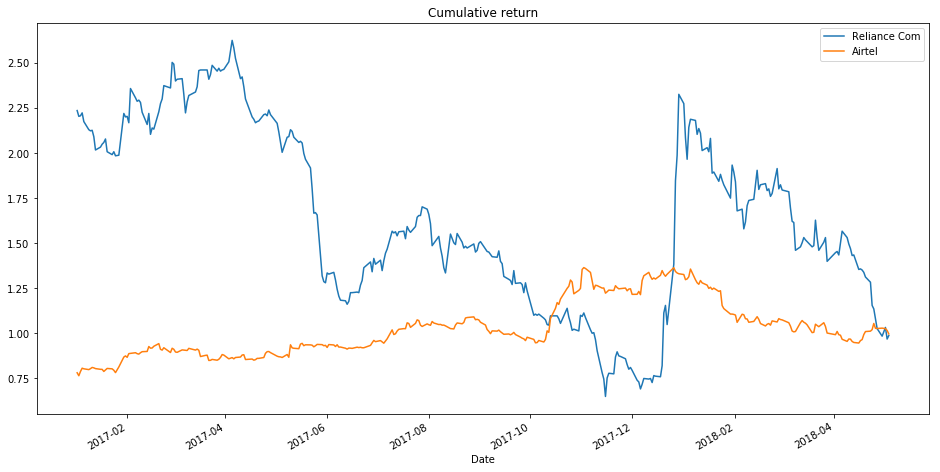

In [34]:
relcom['Cumulative Return'].plot(label='Reliance Com',figsize=(16,8),title='Cumulative return')
airtel['Cumulative Return'].plot(label='Airtel')
plt.legend()

# Realiance vs Airtel who wins you decide 